<a href="https://colab.research.google.com/github/Dhalapathi-DS/ipl_analysis/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing deliveries csv file
deli=pd.read_csv('deliveries.csv')
deli

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
#Data exploration
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
deli.shape

(260920, 17)

In [ ]:
deli.size

4435640

In [ ]:
deli.ndim

2

In [ ]:
#Find null values
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
null_percentage=deli.isnull().mean()*100
null_percentage

,0
match_id,0.000000
inning,0.000000
batting_team,0.000000
bowling_team,0.000000
over,0.000000
ball,0.000000
batter,0.000000
bowler,0.000000
non_striker,0.000000
batsman_runs,0.000000


In [ ]:
#check and fill null values
deli['batsman_runs']+deli['extra_runs']==deli['total_runs']

,0
0,True
1,True
2,True
3,True
4,True
...,...
260915,True
260916,True
260917,True
260918,True


In [ ]:
(deli['batsman_runs']+deli['extra_runs']==deli['total_runs']).value_counts()

,count
True,260920


In [ ]:
deli[['extras_type','extra_runs','player_dismissed','dismissal_kind','fielder']]

,extras_type,extra_runs,player_dismissed,dismissal_kind,fielder
0,legbyes,1,NaN,NaN,NaN
1,NaN,0,NaN,NaN,NaN
2,wides,1,NaN,NaN,NaN
3,NaN,0,NaN,NaN,NaN
4,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...
260915,NaN,0,NaN,NaN,NaN
260916,NaN,0,NaN,NaN,NaN
260917,NaN,0,NaN,NaN,NaN
260918,NaN,0,NaN,NaN,NaN


In [ ]:
#null treatment
deli.loc[deli['extra_runs']==0,'extras_type'].isna().all()


True

In [ ]:
deli['extras_type']=deli['extras_type'].fillna('No Extras')
deli['extras_type']

,extras_type
0,legbyes
1,No Extras
2,wides
3,No Extras
4,No Extras
...,...
260915,No Extras
260916,No Extras
260917,No Extras
260918,No Extras


In [ ]:
deli['extras_type'].isna().value_counts()

,count
extras_type,
False,260920


In [ ]:
deli.loc[deli['player_dismissed'].isna(),'dismissal_kind'].isna().all()

True

In [ ]:
deli[['player_dismissed','dismissal_kind','is_wicket']]

,player_dismissed,dismissal_kind,is_wicket
0,NaN,NaN,0
1,NaN,NaN,0
2,NaN,NaN,0
3,NaN,NaN,0
4,NaN,NaN,0
...,...,...,...
260915,NaN,NaN,0
260916,NaN,NaN,0
260917,NaN,NaN,0
260918,NaN,NaN,0


In [ ]:
deli.loc[deli['player_dismissed'].isna(), 'dismissal_kind'].isna() & (deli.loc[deli['player_dismissed'].isna(), 'is_wicket'] == 0).all()


,dismissal_kind
0,True
1,True
2,True
3,True
4,True
...,...
260915,True
260916,True
260917,True
260918,True


In [ ]:
deli['player_dismissed'] = deli['player_dismissed'].fillna('No Dismissal')
deli['dismissal_kind'] = deli['dismissal_kind'].fillna('N/A')

In [ ]:
deli.loc[deli['fielder'].notna()]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,No Extras,1,SC Ganguly,caught,JH Kallis
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,0,0,No Extras,1,RT Ponting,caught,P Kumar
106,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,DJ Hussey,AA Noffke,BB McCullum,0,0,0,No Extras,1,DJ Hussey,caught,CL White
154,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,4,5,JH Kallis,AB Agarkar,W Jaffer,0,0,0,No Extras,1,JH Kallis,caught,M Kartik
157,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,2,W Jaffer,AB Dinda,CL White,0,0,0,No Extras,1,W Jaffer,caught,RT Ponting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260802,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,10,2,AK Markram,AD Russell,H Klaasen,0,0,0,No Extras,1,AK Markram,caught,MA Starc
260811,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,11,5,Shahbaz Ahmed,CV Varun,H Klaasen,0,0,0,No Extras,1,Shahbaz Ahmed,caught,SP Narine
260817,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,12,5,Abdul Samad,AD Russell,H Klaasen,0,0,0,No Extras,1,Abdul Samad,caught,Rahmanullah Gurbaz
260852,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,3,PJ Cummins,AD Russell,B Kumar,0,0,0,No Extras,1,PJ Cummins,caught,MA Starc


In [ ]:
deli['fielder'] = deli['fielder'].fillna('N/A')

In [ ]:
#check the data after null treatment
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,No Dismissal,N/A,N/A
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extras,0,No Dismissal,N/A,N/A
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,No Dismissal,N/A,N/A
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extras,0,No Dismissal,N/A,N/A
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extras,0,No Dismissal,N/A,N/A


In [ ]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [ ]:
# Filter for wickets and group by bowler, counting the number of wickets
highest_wicket_bowler = deli[deli['is_wicket'] == 1].groupby('bowler').size().idxmax()
highest_wicket_count = deli[deli['bowler'] == highest_wicket_bowler]['is_wicket'].sum()
print(f'Bowler with the highest wickets: {highest_wicket_bowler} with {highest_wicket_count} wickets')


Bowler with the highest wickets: YS Chahal with 213 wickets


In [ ]:
#highest wicket takers and their count
wicket_counts = deli[deli['is_wicket'] == 1]['bowler'].value_counts()
wicket_counts

,count
bowler,
YS Chahal,213
DJ Bravo,207
PP Chawla,201
SP Narine,200
R Ashwin,198
...,...
CJ McKay,1
GR Napier,1
AA Jhunjhunwala,1


In [ ]:
# Group by batter and sum the runs, then find the batsman with the highest score
highest_scorer = deli.groupby('batter')['batsman_runs'].sum().idxmax()
highest_score = deli.groupby('batter')['batsman_runs'].sum().max()

print(f'Batsman with the highest score: {highest_scorer} with {highest_score} runs')


Batsman with the highest score: V Kohli with 8014 runs


In [ ]:
# Group by batsman and sum their runs, then sort in descending order and get the top 5
top_batsmen = deli.groupby('batter')['batsman_runs'].sum().nlargest(5)

print(top_batsmen)


batter
V Kohli      8014
S Dhawan     6769
RG Sharma    6630
DA Warner    6567
SK Raina     5536
Name: batsman_runs, dtype: int64


In [ ]:
# highest wickets and kinds of dismissal
wicket_data = deli[deli['is_wicket'] == 1]
wicket_counts = wicket_data['bowler'].value_counts()
highest_wicket_bowler = wicket_counts.idxmax()
highest_wicket_count = wicket_counts.max()
dismissal_kinds = wicket_data[wicket_data['bowler'] == highest_wicket_bowler]['dismissal_kind'].value_counts()
print(f'Bowler with the highest wickets: {highest_wicket_bowler} with {highest_wicket_count} wickets')
print('Kinds of dismissals:')
print(dismissal_kinds)


Bowler with the highest wickets: YS Chahal with 213 wickets
Kinds of dismissals:
dismissal_kind
caught               127
bowled                36
stumped               20
lbw                   18
run out                8
caught and bowled      4
Name: count, dtype: int64


In [ ]:
#Highest wicket taker in powerplay
early_wicket_data = deli[(deli['over'] <= 6) & (deli['is_wicket'] == 1)]
early_wicket_counts = early_wicket_data['bowler'].value_counts()
highest_early_wicket_bowler = early_wicket_counts.idxmax()
highest_early_wicket_count = early_wicket_counts.max()
print(f'Bowler with the highest wickets in the first 0 to 6 overs: {highest_early_wicket_bowler} with {highest_early_wicket_count} wickets')


Bowler with the highest wickets in the first 0 to 6 overs: B Kumar with 77 wickets


In [ ]:
#Highest wicket taker in death overs
last_overs_start = 17
last_overs_end = 20
last_wicket_data = deli[(deli['over'] >= last_overs_start) & (deli['over'] <= last_overs_end) & (deli['is_wicket'] == 1)]
last_wicket_counts = last_wicket_data['bowler'].value_counts()
highest_last_wicket_bowler = last_wicket_counts.idxmax()
highest_last_wicket_count = last_wicket_counts.max()
print(f'Bowler with the highest wickets in the last 4 overs: {highest_last_wicket_bowler} with {highest_last_wicket_count} wickets')



Bowler with the highest wickets in the last 4 overs: DJ Bravo with 103 wickets


In [ ]:
#Highest wicket taker in middle overs
middle_wicket_data = deli[(deli['over'] >= 6) & (deli['over'] <= 16) & (deli['is_wicket'] == 1)]
middle_wicket_counts = middle_wicket_data['bowler'].value_counts()
highest_middle_wicket_bowler = middle_wicket_counts.idxmax()
highest_middle_wicket_count = middle_wicket_counts.max()
print(f'Bowler with the highest wickets from the 6th to 16th over: {highest_middle_wicket_bowler} with {highest_middle_wicket_count} wickets')



Bowler with the highest wickets from the 6th to 16th over: YS Chahal with 175 wickets


In [ ]:
#Highest score by a batsman in a single match
highest_score = deli.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
max_score_row = highest_score.loc[highest_score['batsman_runs'].idxmax()]
print(f'Highest score by a batsman in a single match: {max_score_row["batter"]} scored {max_score_row["batsman_runs"]} runs in match {max_score_row["match_id"]}')


Highest score by a batsman in a single match: CH Gayle scored 175 runs in match 598027


In [ ]:
#atsman with the highest number of dot balls
dot_data = deli[deli['batsman_runs'] == 0]
dot_counts = dot_data['batter'].value_counts()
highest_duck_batsman = dot_counts.idxmax()
highest_duck_count = dot_counts.max()
print(f'Batsman with the highest number of dot balls: {highest_duck_batsman} with {highest_duck_count} ducks')



Batsman with the highest number of dot balls: V Kohli with 2198 ducks


In [ ]:
#Top 5 batsmen with the highest number of dots
deli['is_dot'] = deli['batsman_runs'] == 0
dot_counts = deli.groupby(['match_id', 'batter'])['is_dot'].sum().reset_index()
total_dots = dot_counts.groupby('batter')['is_dot'].sum().reset_index()
top_dots = total_dots.sort_values(by='is_dot', ascending=False).head(5)
print('Top 5 batsmen with the highest number of dots:')
for index, row in top_dots.iterrows():
  print(f'{row["batter"]}: {row["is_dot"]} dots')



Top 5 batsmen with the highest number of dots:
V Kohli: 2198 dots
S Dhawan: 2136 dots
RG Sharma: 2036 dots
DA Warner: 1873 dots
CH Gayle: 1636 dots


In [ ]:
#Total balls faced by V Kohli
kohli_data = deli[deli['batter'] == 'V Kohli']
total_balls_faced = kohli_data.shape[0]
print(f'Total balls faced by V Kohli: {total_balls_faced}')


Total balls faced by V Kohli: 6236


In [ ]:
#importing matches csv
mat=pd.read_csv('matches.csv')
mat

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [ ]:
#Data exploration
mat.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
mat.size

21900

In [ ]:
mat.shape

(1095, 20)

In [ ]:
mat.ndim

2

In [ ]:
#Identifying null values
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
mat['city'].isna().value_counts()

,count
city,
False,1044
True,51


In [ ]:
mat[mat['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni


In [ ]:
mat.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
#Null treatment
mat['city']=mat['city'].fillna(mat['venue'].str.split().str[0])

In [ ]:
mat['city'].isna().value_counts()

,count
city,
False,1095


In [ ]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
mat.loc[mat['player_of_match'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [ ]:
mat['player_of_match'].isna().value_counts()

,count
player_of_match,
False,1090
True,5


In [ ]:
mat['player_of_match'] = mat['player_of_match'].fillna('No Player of Match')

In [ ]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
mat.loc[mat['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,No Player of Match,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,No Player of Match,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,No Player of Match,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,No Player of Match,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,No Player of Match,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [ ]:
mat['winner'] = mat['winner'].fillna('No Winner')

In [ ]:
mat['target_runs'] = mat['target_runs'].fillna('N/A')
mat['target_overs'] = mat['target_overs'].fillna('N/A')


In [ ]:
mat.loc[mat['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,No Player of Match,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,No Winner,no result,NaN,N/A,N/A,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,No Player of Match,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,No Winner,no result,NaN,N/A,N/A,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,No Player of Match,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,No Winner,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


In [ ]:
mat['result_margin'] = mat['result_margin'].fillna('N/A')

In [ ]:
mat.loc[mat['method'].notna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
38,336022,2007/08,Delhi,2008-05-17,League,DPMD Jayawardene,Feroz Shah Kotla,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,89.0,8.0,N,D/L,AV Jayaprakash,RE Koertzen
41,336025,2007/08,Kolkata,2008-05-18,League,M Ntini,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,53.0,8.0,N,D/L,Asad Rauf,K Hariharan
60,392183,2009,Cape Town,2009-04-19,League,DL Vettori,Newlands,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,54.0,6.0,N,D/L,MR Benson,SD Ranade
63,392186,2009,Durban,2009-04-21,League,CH Gayle,Kingsmead,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,69.0,9.2,N,D/L,DJ Harper,SD Ranade
89,392214,2009,Centurion,2009-05-07,League,ML Hayden,SuperSport Park,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,187.0,18.0,N,D/L,DJ Harper,TH Wijewardene
192,501215,2011,Kochi,2011-04-18,League,BB McCullum,Nehru Stadium,Kochi Tuskers Kerala,Chennai Super Kings,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,7.0,135.0,17.0,N,D/L,K Hariharan,AL Hill
221,501245,2011,Kolkata,2011-05-07,League,Iqbal Abdulla,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,runs,10.0,52.0,10.0,N,D/L,Asad Rauf,PR Reiffel
231,501255,2011,Bangalore,2011-05-14,League,CH Gayle,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,102.0,13.0,N,D/L,RE Koertzen,RB Tiffin
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Feroz Shah Kotla,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,43.0,5.0,N,D/L,RM Deshpande,BNJ Oxenford
476,829743,2015,Visakhapatnam,2015-04-22,League,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,16.0,118.0,12.0,N,D/L,RK Illingworth,VA Kulkarni


In [ ]:
mat['method'] = mat['method'].fillna('N/A')

In [ ]:
#check after null treatment
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   venue            1095 non-null   object
 7   team1            1095 non-null   object
 8   team2            1095 non-null   object
 9   toss_winner      1095 non-null   object
 10  toss_decision    1095 non-null   object
 11  winner           1095 non-null   object
 12  result           1095 non-null   object
 13  result_margin    1095 non-null   object
 14  target_runs      1095 non-null   object
 15  target_overs     1095 non-null   object
 16  super_over       1095 non-null   object
 17  method           1095 non-null   

In [ ]:
# Calculate the percentage of NaN values for each column
null_percentage = mat.isna().mean() * 100
print(null_percentage)


id                 0.0
season             0.0
city               0.0
date               0.0
match_type         0.0
player_of_match    0.0
venue              0.0
team1              0.0
team2              0.0
toss_winner        0.0
toss_decision      0.0
winner             0.0
result             0.0
result_margin      0.0
target_runs        0.0
target_overs       0.0
super_over         0.0
method             0.0
umpire1            0.0
umpire2            0.0
dtype: float64


In [ ]:
#Number of wins by team
mat['winner'].value_counts()

,count
winner,
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bangalore,116
Rajasthan Royals,112
Kings XI Punjab,88
Sunrisers Hyderabad,88
Delhi Daredevils,67
Delhi Capitals,48


In [ ]:
#Matches played,wins and win percenatage
matches_played = mat['team1'].value_counts() + mat['team2'].value_counts()
wins = mat['winner'].value_counts()
results = pd.DataFrame({'Matches Played': matches_played, 'Wins': wins}).fillna(0)
results['Win Percentage'] = (results['Wins'] / results['Matches Played']) * 100
results['Win Percentage'] = results['Win Percentage'].fillna(0)
print(results)


                             Matches Played  Wins  Win Percentage
Chennai Super Kings                   238.0   138       57.983193
Deccan Chargers                        75.0    29       38.666667
Delhi Capitals                         91.0    48       52.747253
Delhi Daredevils                      161.0    67       41.614907
Gujarat Lions                          30.0    13       43.333333
Gujarat Titans                         45.0    28       62.222222
Kings XI Punjab                       190.0    88       46.315789
Kochi Tuskers Kerala                   14.0     6       42.857143
Kolkata Knight Riders                 251.0   131       52.191235
Lucknow Super Giants                   44.0    24       54.545455
Mumbai Indians                        261.0   144       55.172414
No Winner                               0.0     5             inf
Pune Warriors                          46.0    12       26.086957
Punjab Kings                           56.0    24       42.857143
Rajasthan 

In [ ]:
mat['city'].value_counts()

,count
city,
Mumbai,173
Kolkata,93
Delhi,90
Chennai,85
Hyderabad,77
Bangalore,65
Chandigarh,61
Jaipur,57
Pune,51


In [ ]:
toss_influence=mat[mat['toss_winner'] == mat['winner']]
toss_influence

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,N/A,MR Benson,SL Shastri
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,N/A,Asad Rauf,MR Benson
10,335992,2007/08,Bangalore,2008-04-26,League,SR Watson,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,136.0,20.0,N,N/A,MR Benson,IL Howell
12,335994,2007/08,Mumbai,2008-04-27,League,AC Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,10.0,155.0,20.0,N,N/A,Asad Rauf,SL Shastri
14,335996,2007/08,Bangalore,2008-04-28,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,179.0,20.0,N,N/A,BR Doctrove,RB Tiffin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,1426287,2024,Chennai,2024-05-01,League,Harpreet Brar,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Punjab Kings,Punjab Kings,field,Punjab Kings,wickets,7.0,163.0,20.0,N,N/A,HAS Khalid,VK Sharma
1073,1426288,2024,Hyderabad,2024-05-02,League,B Kumar,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,1.0,202.0,20.0,N,N/A,AK Chaudhary,YC Barde
1075,1426290,2024,Bengaluru,2024-05-04,League,Mohammed Siraj,"M Chinnaswamy Stadium, Bengaluru",Gujarat Titans,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,Royal Challengers Bengaluru,wickets,4.0,148.0,20.0,N,N/A,A Totre,Vinod Seshan
1078,1426293,2024,Mumbai,2024-05-06,League,SA Yadav,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,7.0,174.0,20.0,N,N/A,Navdeep Singh,Tapan Sharma


In [ ]:
toss_influence['winner'].value_counts()

,count
winner,
Mumbai Indians,78
Chennai Super Kings,75
Kolkata Knight Riders,68
Rajasthan Royals,60
Royal Challengers Bangalore,57
Sunrisers Hyderabad,38
Kings XI Punjab,36
Delhi Daredevils,35
Delhi Capitals,26


In [ ]:
#Toss influence
toss_winner_won_df = mat[mat['toss_winner'] == mat['winner']]
toss_winner_lost_df = mat[mat['toss_winner'] != mat['winner']]
toss_winner_won_counts = toss_winner_won_df['toss_winner'].value_counts()
toss_winner_lost_counts = toss_winner_lost_df['toss_winner'].value_counts()

comparison_by_team = pd.DataFrame({
    'Toss Winner Won': toss_winner_won_counts,
    'Toss Winner Lost': toss_winner_lost_counts
}).fillna(0)
comparison_by_team['Total Tosses Won'] = comparison_by_team['Toss Winner Won'] + comparison_by_team['Toss Winner Lost']
comparison_by_team['Winning Percentage'] = (comparison_by_team['Toss Winner Won'] / comparison_by_team['Total Tosses Won']) * 100
comparison_by_team


,Toss Winner Won,Toss Winner Lost,Total Tosses Won,Winning Percentage
toss_winner,,,,
Chennai Super Kings,75,47,122,61.475410
Deccan Chargers,19,24,43,44.186047
Delhi Capitals,26,24,50,52.000000
Delhi Daredevils,35,45,80,43.750000
Gujarat Lions,10,5,15,66.666667
Gujarat Titans,14,8,22,63.636364
Kings XI Punjab,36,49,85,42.352941
Kochi Tuskers Kerala,4,4,8,50.000000
Kolkata Knight Riders,68,54,122,55.737705


In [ ]:
#Join mat and deli table
df_join = pd.merge(deli, mat, left_on='match_id', right_on='id', how='inner')
df_join

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,N/A,J Madanagopal,Nitin Menon
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,N/A,J Madanagopal,Nitin Menon
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,N/A,J Madanagopal,Nitin Menon
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,N/A,J Madanagopal,Nitin Menon


In [ ]:
#checking after join
mat.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
deli.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'is_dot'],
      dtype='object')

In [ ]:
df_join.isna().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
df_join.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'is_dot', 'id', 'season', 'city', 'date',
       'match_type', 'player_of_match', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin',
       'target_runs', 'target_overs', 'super_over', 'method', 'umpire1',
       'umpire2'],
      dtype='object')

In [ ]:
a=deli.shape
b=mat.shape
c=df_join.shape
print(a,b,c)

(260920, 18) (1095, 20) (260920, 38)


In [ ]:
df_join.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,N/A,Asad Rauf,RE Koertzen


In [ ]:
#Highest man of the match
player_of_match_count = df_join[['match_id', 'player_of_match', 'winner']].drop_duplicates()
player_of_match_count = player_of_match_count['player_of_match'].value_counts().reset_index()
player_of_match_count.columns = ['player', 'count']
team_mapping = df_join[['player_of_match', 'team1', 'team2', 'winner']].drop_duplicates()
team_mapping['team'] = team_mapping.apply(lambda row: row['team1'] if row['winner'] == row['team1'] else row['team2'], axis=1)
team_mapping = team_mapping.drop_duplicates(subset=['player_of_match'])
player_awards_info = player_of_match_count.merge(team_mapping, left_on='player', right_on='player_of_match', how='left')
top_player = player_awards_info.loc[player_awards_info['count'].idxmax()]
print(f"Player with the most Player of the Match awards:")
print(f"Name: {top_player['player']}")
print(f"Awards Count: {top_player['count']}")
print(f"Team: {top_player['team']}")
print(f"Winning Status: {'Won' if top_player['team'] == top_player['winner'] else 'Did not win'}")


Player with the most Player of the Match awards:
Name: AB de Villiers
Awards Count: 25
Team: Delhi Daredevils
Winning Status: Won


In [ ]:
#Team wise Man of the macth award
unique_matches = df_join.drop_duplicates(subset=['match_id'])
ab_de_villiers_awards = unique_matches[unique_matches['player_of_match'] == 'AB de Villiers']
ab_de_villiers_team_awards = ab_de_villiers_awards.groupby('winner').size().reset_index(name='award_count')
print("Player of the Match awards won by AB de Villiers for each team:")
print(ab_de_villiers_team_awards)


Player of the Match awards won by AB de Villiers for each team:
                        winner  award_count
0             Delhi Daredevils            2
1  Royal Challengers Bangalore           23


In [ ]:
#Top highest man of the macth
unique_matches = df_join.drop_duplicates(subset=['match_id'])
top_players = unique_matches['player_of_match'].value_counts().head(5).index
top_players_awards = unique_matches[unique_matches['player_of_match'].isin(top_players)]
top_players_team_awards = top_players_awards.groupby(['player_of_match', 'winner']).size().reset_index(name='award_count')
print("Player of the Match awards for the top 5 players by team:")
print(top_players_team_awards)


Player of the Match awards for the top 5 players by team:
   player_of_match                       winner  award_count
0   AB de Villiers             Delhi Daredevils            2
1   AB de Villiers  Royal Challengers Bangalore           23
2         CH Gayle              Kings XI Punjab            4
3         CH Gayle        Kolkata Knight Riders            1
4         CH Gayle  Royal Challengers Bangalore           17
5        DA Warner               Delhi Capitals            1
6        DA Warner             Delhi Daredevils            5
7        DA Warner          Sunrisers Hyderabad           12
8        RG Sharma              Deccan Chargers            3
9        RG Sharma               Mumbai Indians           16
10         V Kohli                Gujarat Lions            1
11         V Kohli  Royal Challengers Bangalore           15
12         V Kohli  Royal Challengers Bengaluru            2


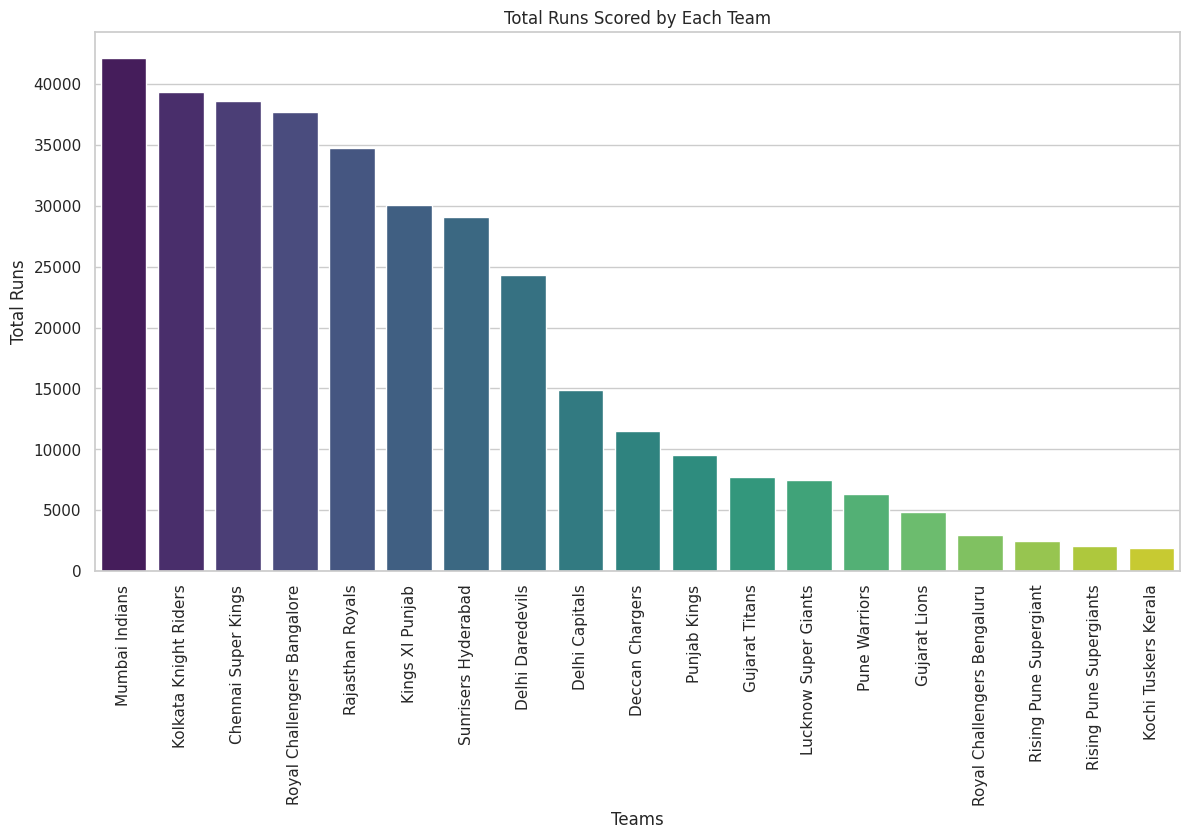

In [ ]:
sns.set(style="whitegrid")

# 1. Team Performance: Total runs scored by each team across seasons
plt.figure(figsize=(14, 7))
team_runs = df_join.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
sns.barplot(x=team_runs.index, y=team_runs.values, palette="viridis")
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Teams')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

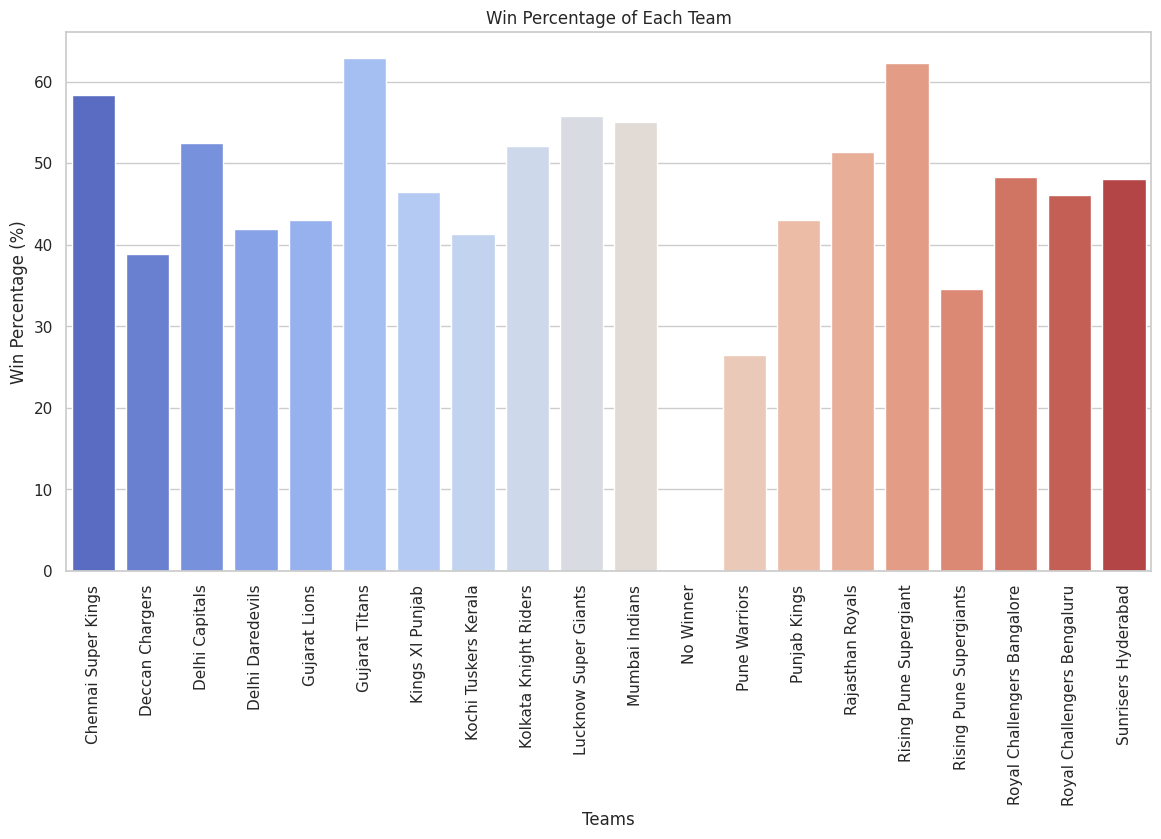

In [ ]:
#Win percentage
matches_played = df_join['team1'].value_counts() + df_join['team2'].value_counts()
matches_won = df_join['winner'].value_counts()
win_percentage = (matches_won / matches_played) * 100
plt.figure(figsize=(14, 7))
sns.barplot(x=win_percentage.index, y=win_percentage.values, palette="coolwarm")
plt.title('Win Percentage of Each Team')
plt.xlabel('Teams')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=90)
plt.show()


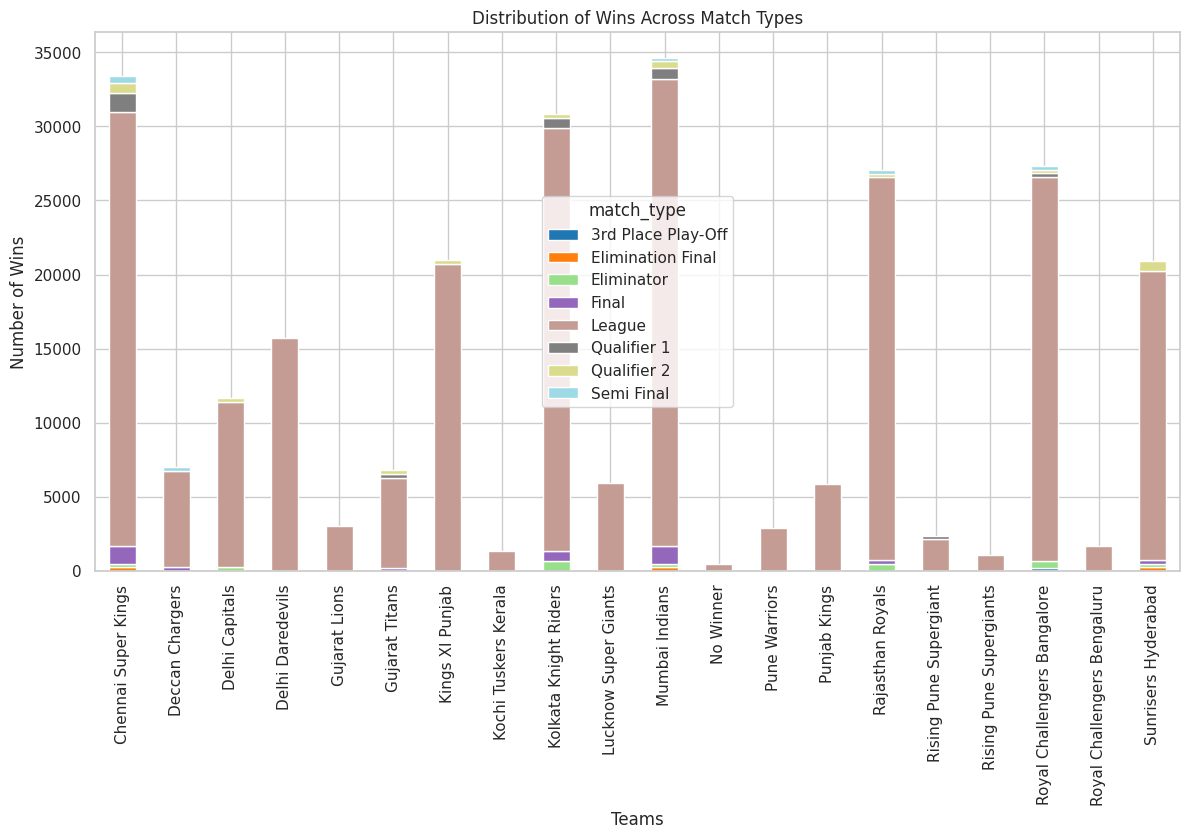

In [ ]:
# Stacked bar chart for distribution of wins across match types
match_type_wins = df_join.pivot_table(index='winner', columns='match_type', aggfunc='size', fill_value=0)
match_type_wins.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Distribution of Wins Across Match Types')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()


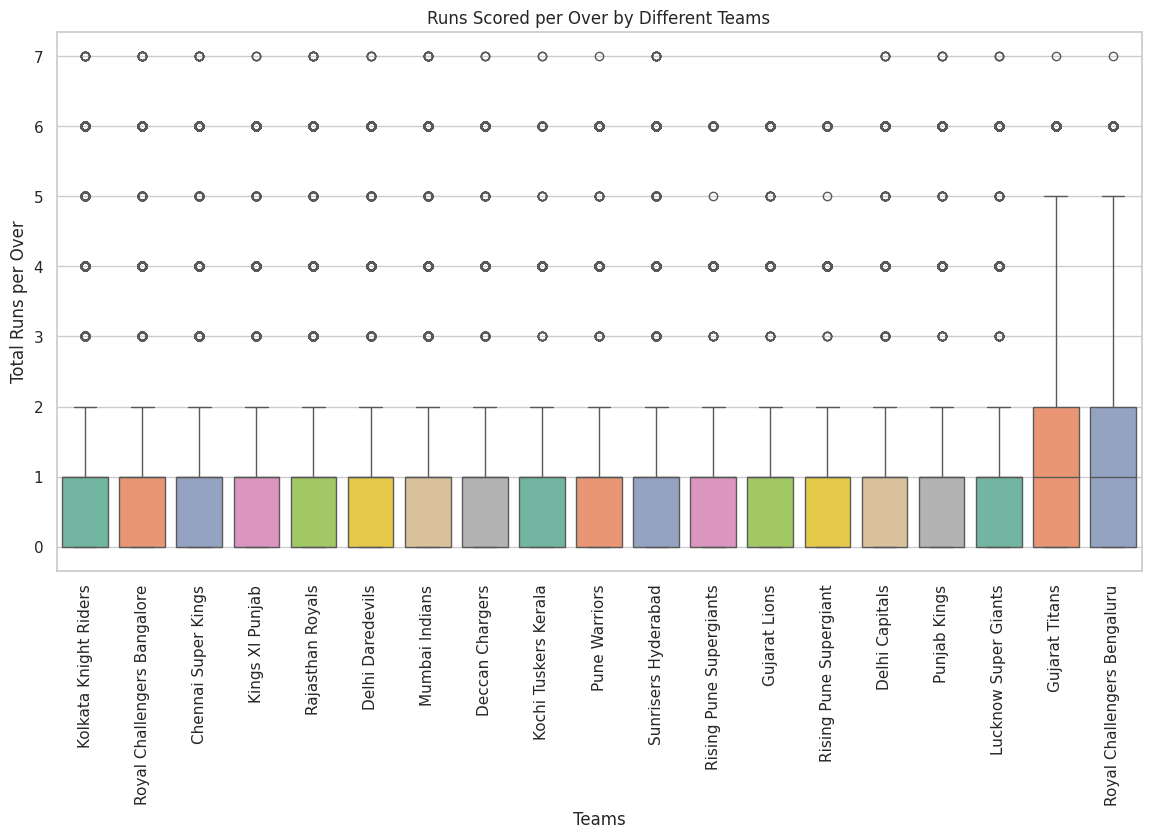

In [ ]:
# Boxplot for runs scored per over by different teams
plt.figure(figsize=(14, 7))
sns.boxplot(x='batting_team', y='total_runs', data=df_join, palette="Set2")
plt.title('Runs Scored per Over by Different Teams')
plt.xlabel('Teams')
plt.ylabel('Total Runs per Over')
plt.xticks(rotation=90)
plt.show()

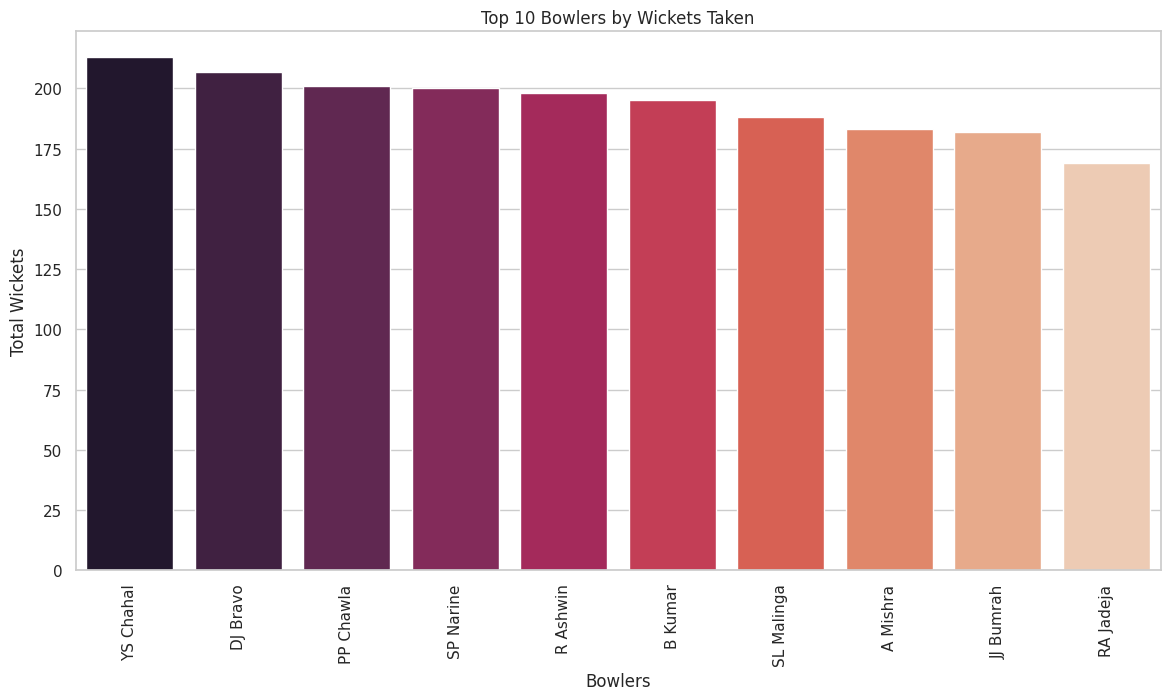

In [ ]:
#Top 10 wicket takers
plt.figure(figsize=(14, 7))
wickets_per_season = df_join.groupby(['season', 'bowler'])['is_wicket'].sum().reset_index()
top_bowlers = wickets_per_season.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette="rocket")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Bowlers')
plt.ylabel('Total Wickets')
plt.xticks(rotation=90)
plt.show()


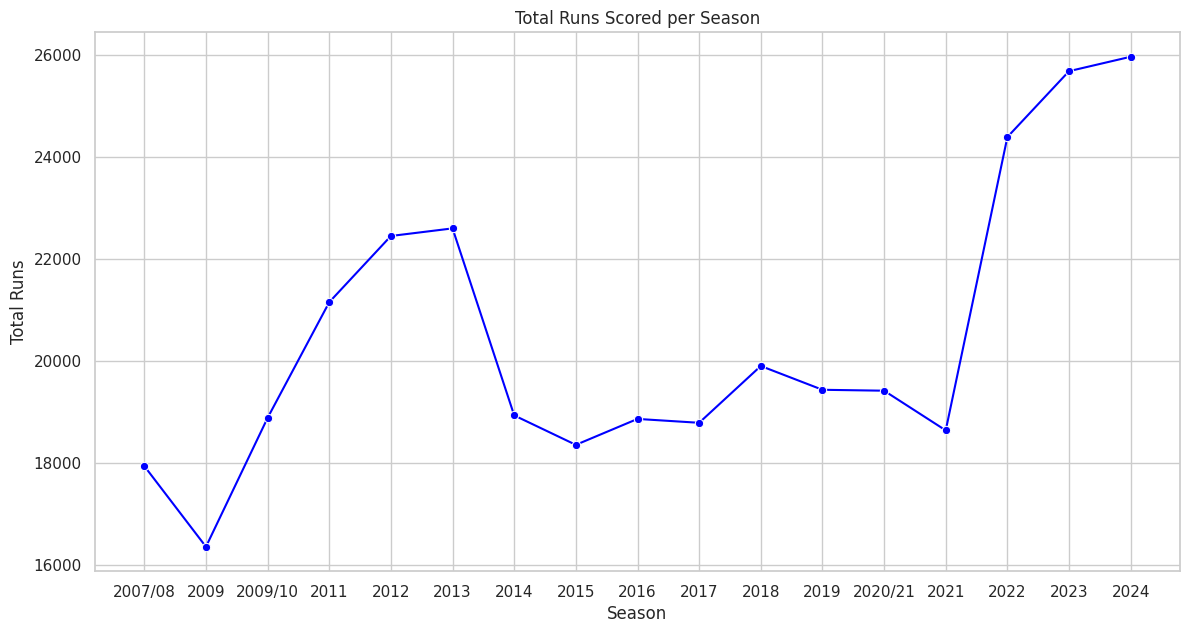

In [ ]:
#Total runs scored over different seasons
plt.figure(figsize=(14, 7))
season_runs = df_join.groupby('season')['total_runs'].sum()
sns.lineplot(x=season_runs.index, y=season_runs.values, marker='o', color='blue')
plt.title('Total Runs Scored per Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.show()

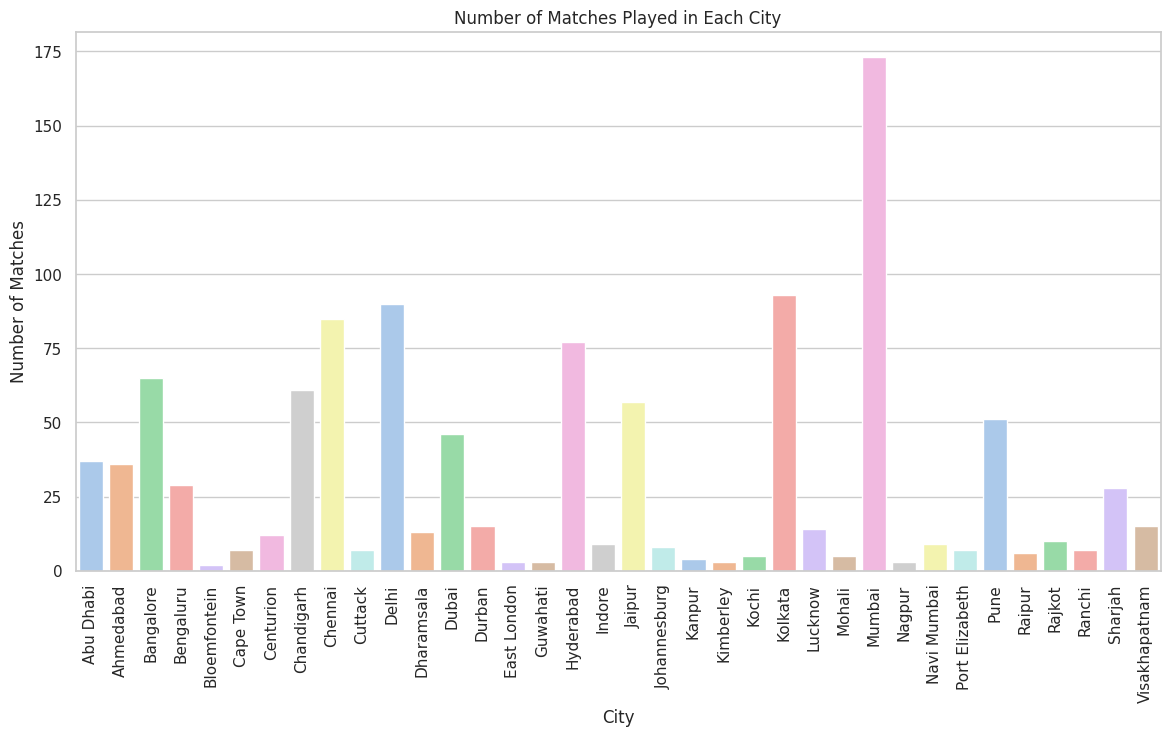

In [ ]:
# Count unique matches played in each city
plt.figure(figsize=(14, 7))

# Dropping duplicates based on a unique identifier like 'match_id'
city_matches = df_join.drop_duplicates(subset='match_id').groupby('city').size().reset_index(name='matches_played')

sns.barplot(x='city', y='matches_played', data=city_matches, palette="pastel")
plt.title('Number of Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()



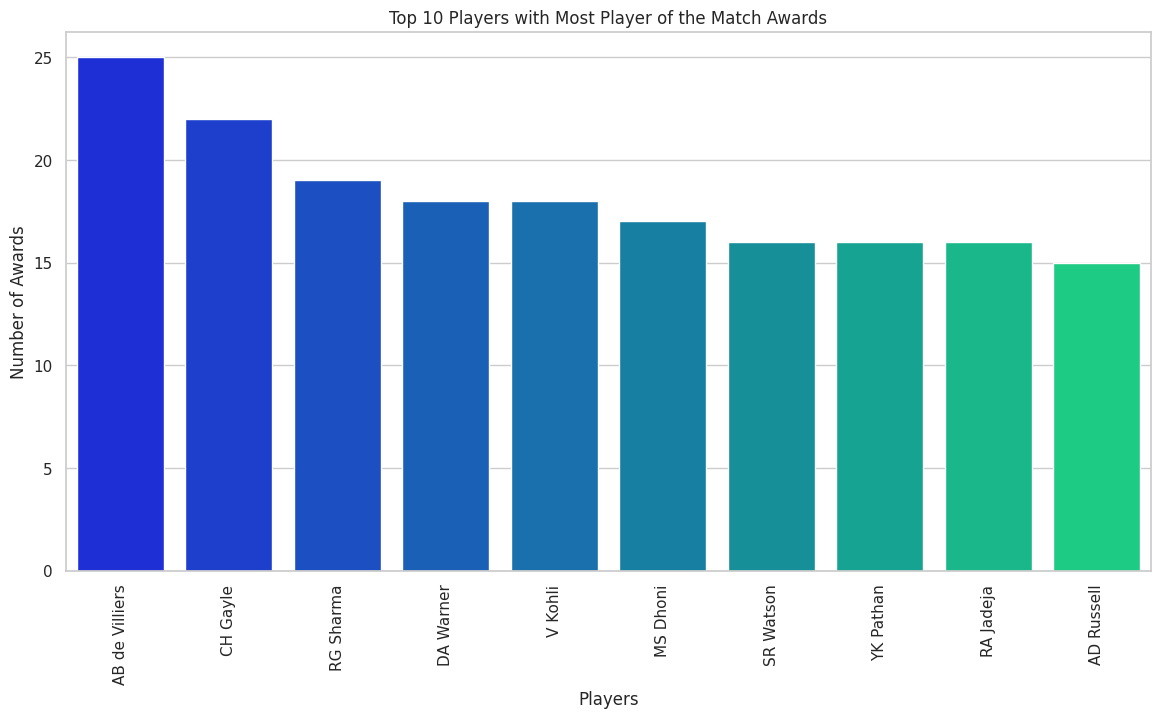

In [ ]:
#Most player of the match awards
unique_awards = df_join[['match_id', 'player_of_match']].drop_duplicates()
player_awards = unique_awards['player_of_match'].value_counts().head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=player_awards.index, y=player_awards.values, palette="winter")
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Players')
plt.ylabel('Number of Awards')
plt.xticks(rotation=90)
plt.show()


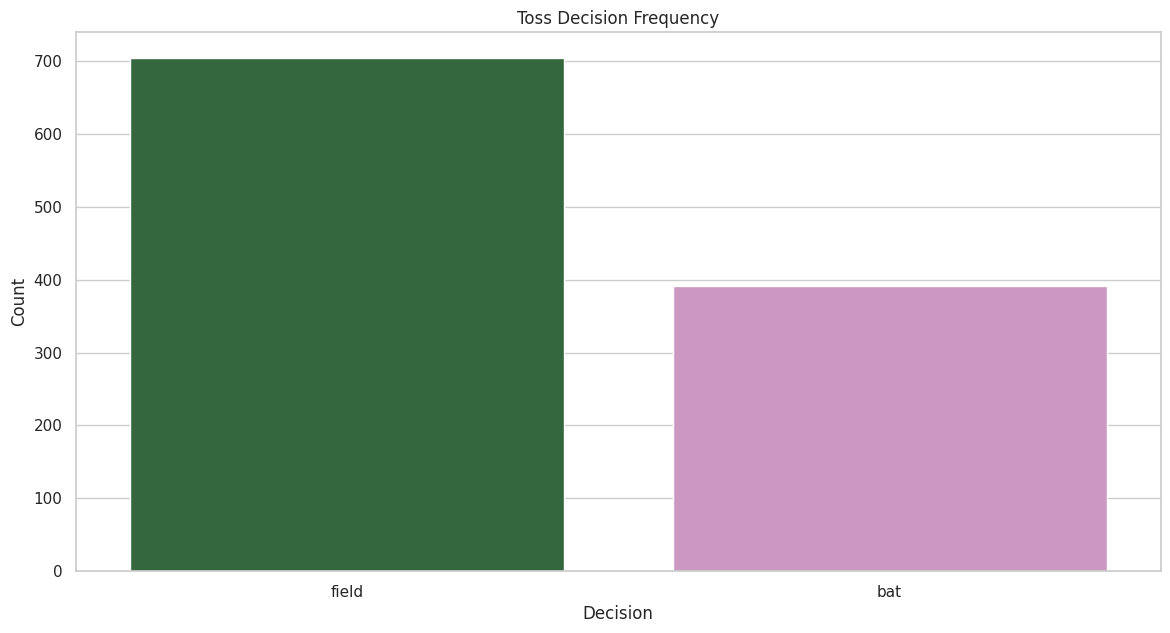

In [ ]:
#Toss decision frequency
unique_tosses = df_join[['match_id', 'toss_decision']].drop_duplicates()
toss_decisions = unique_tosses['toss_decision'].value_counts()
plt.figure(figsize=(14, 7))
sns.barplot(x=toss_decisions.index, y=toss_decisions.values, palette="cubehelix")
plt.title('Toss Decision Frequency')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

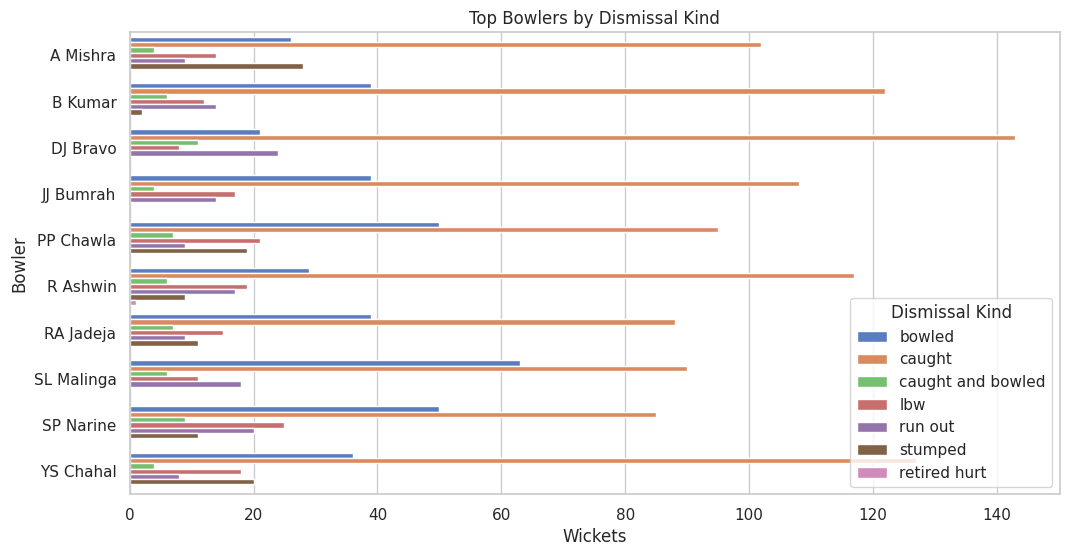

In [ ]:
# Top bowlers and their dismissal kind
dismissal_analysis = df_join[df_join['is_wicket'] == 1].groupby(['bowler', 'dismissal_kind']).size().reset_index(name='count')
top_bowlers = dismissal_analysis.groupby('bowler')['count'].sum().sort_values(ascending=False).head(10).index
dismissal_analysis = dismissal_analysis[dismissal_analysis['bowler'].isin(top_bowlers)]
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='bowler', hue='dismissal_kind', data=dismissal_analysis, palette='muted')
plt.title('Top Bowlers by Dismissal Kind')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.legend(title='Dismissal Kind')
plt.show()


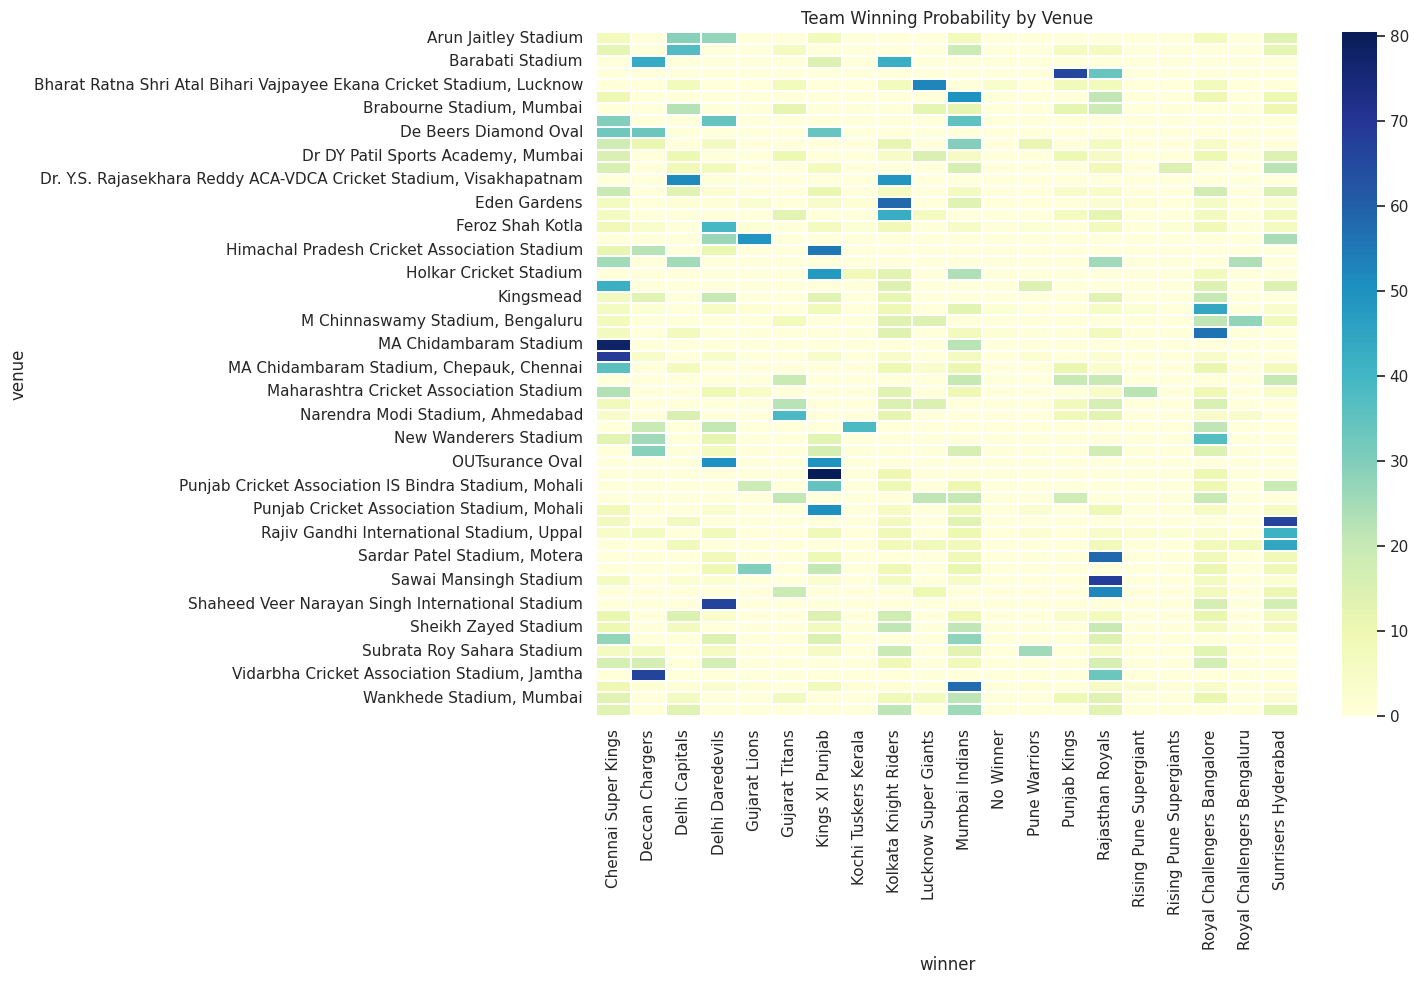

In [ ]:
#Team win probability by venue
required_columns = ['venue', 'winner']
missing_columns = [col for col in required_columns if col not in df_join.columns]
venue_wins = df_join.groupby(['venue', 'winner']).size().reset_index(name='win_count')
total_matches = df_join.groupby('venue').size().reset_index(name='total_matches')
venue_win_prob = pd.merge(venue_wins, total_matches, on='venue')
venue_win_prob['win_percentage'] = (venue_win_prob['win_count'] / venue_win_prob['total_matches']) * 100
venue_pivot = venue_win_prob.pivot(index='venue', columns='winner', values='win_percentage').fillna(0)
plt.figure(figsize=(15, 10))
sns.heatmap(venue_pivot, cmap='YlGnBu', linecolor='white', linewidths=0.1)
plt.title('Team Winning Probability by Venue')
plt.tight_layout()
plt.show()


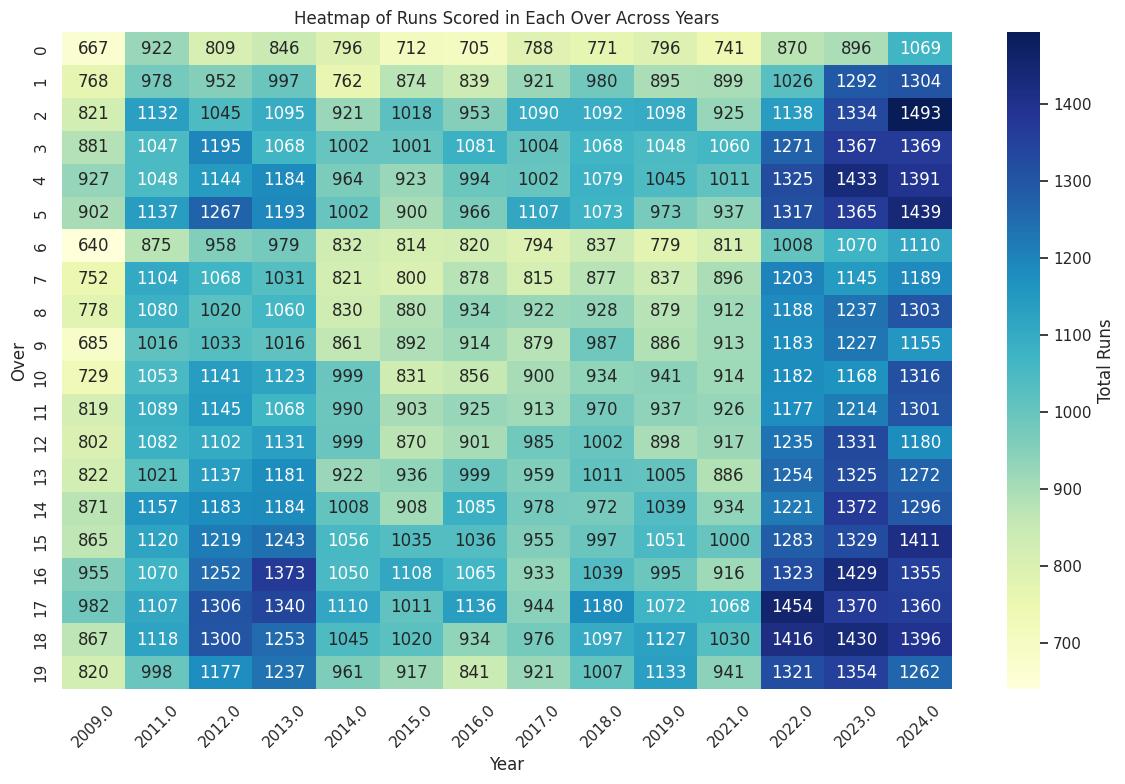

In [ ]:
#Heatmap of Runs Scored in Each Over Across Years
df_join['over'] = df_join['over'].astype(int)
df_join['season'] = pd.to_numeric(df_join['season'], errors='coerce')
df_runs = df_join[['season', 'over', 'total_runs']].dropna()
runs_per_over = df_runs.groupby(['season', 'over']).sum().reset_index()
heatmap_data = runs_per_over.pivot(index='over', columns='season', values='total_runs').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Total Runs'})
plt.title('Heatmap of Runs Scored in Each Over Across Years')
plt.xlabel('Year')
plt.ylabel('Over')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


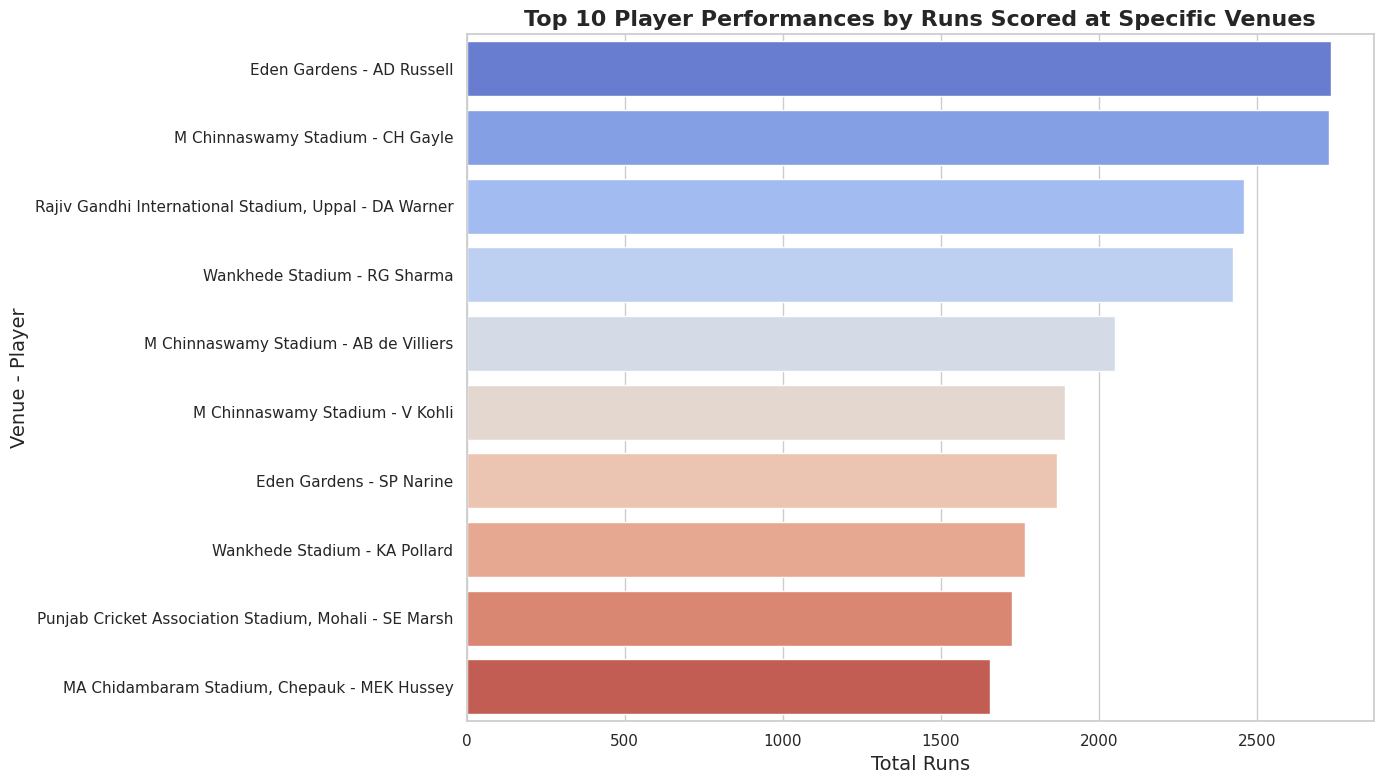

In [ ]:
# Combine venue and player_of_match for better visualization
venue_performance['venue_player'] = venue_performance['venue'] + " - " + venue_performance['player_of_match']
top_venue_performers = venue_performance.sort_values(by='total_runs', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='total_runs', y='venue_player', data=top_venue_performers.head(10), palette='coolwarm')
plt.title('Top 10 Player Performances by Runs Scored at Specific Venues', fontsize=16, fontweight='bold')
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Venue - Player', fontsize=14)
plt.tight_layout()
plt.show()
